O nosso dataset é um relatório de todos os casos envolvendo alguma agressão causada por armas de fogo nos EUA (https://www.kaggle.com/datasets/whisperingkahuna/gunviolence1/data), pegamos essa tabela no Kaggle e ela foi pega a partir do "Gun Violence Archive", postada em 2024. Uma observação deste dataset, é uma interpretação estatística da violência por armas de fogo no país. Cada coluna é bem auto-explicativa e indica os dados de cada ocorrência, sendo estado, cidade, coordenadas, número de vítimas mortas ou feridas, etc. Os valores aceitáveis para as colunas são strings (estado, cidade, município, endereço) e floats/inteiros (ID da ocorrência, coordenadas, número de vítimas e/ou feridos).

## Carregamento e tratamento

Você deve carregar os dados em memória usando a biblioteca pandas.

In [ ]:
!pip install opendatasets
!pip install contextily
import pandas as pd
import geopandas as geo
import requests as req
import opendatasets as od
import contextily as cx

In [ ]:
#Credenciais: Username='brunodalben' Key='3f462b7b2c7a7a343720379a6ad05ef3'
od.download(
    "https://www.kaggle.com/datasets/whisperingkahuna/gunviolence1/data", force=True
    )
arq=pd.read_csv(r"gunviolence1/updated_with_coordinates.csv")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: brunodalben
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/whisperingkahuna/gunviolence1


100%|██████████| 13.9k/13.9k [00:00<00:00, 5.69MB/s]

In [ ]:
arq = arq.drop(columns=['Operations','Coordinates_Found','Incident ID'])
arq['Victims Killed']=arq['Victims Killed'].astype(float)
arq['Suspects Killed']=arq['Suspects Killed'].astype(float)
arq['Suspects Injured']=arq['Suspects Injured'].astype(float)
arq['Victims Injured']=arq['Victims Injured'].astype(float)
arq['Suspects Arrested']=arq['Suspects Arrested'].astype(float)

### Condição 1

Há duplicatas?


In [ ]:
arq_test=arq.drop_duplicates()
if arq_test.shape[0]==arq.shape[0]:
  print("Não há duplicatas")
else:
  print("Há duplicatas")

Não há duplicatas


### Condição $2$

[Checa se há mais casos onde houveram mais mortos do que feridos, pois o comum é mais feridos que mortos]

In [ ]:
morto=arq['Victims Killed']
ferido=arq['Victims Injured']

In [ ]:
#mpc = é a relação de casos onde houveram mais mortos que feridos
mpc=(morto > ferido).mean()
if mpc>=0.5:
  print("Há mais casos onde houveram mais mortos do que feridos")
else:
  print("Não há mais casos onde houveram mais mortos do que feridos")

Não há mais casos onde houveram mais mortos do que feridos


### Condição $3$

[Checa se há números menores que zero (todos devem ser naturais)]

In [ ]:
s = 0
for i in arq['Victims Killed']:
  if i<0:
    s=1
for i in arq['Victims Injured']:
  if i<0:
    s=1
if s ==0:
  print("Não há números menores que zero")
else:
  print("Há números menores que zero")

Não há números menores que zero


In [ ]:
d={'Médias': []}
l=[]
for i in arq['State'].unique():
  filtered_arq = arq[arq['State']==f'{i}']
  Média_mortos = filtered_arq['Victims Killed'].mean()
  Mediana_mortos = filtered_arq['Victims Killed'].median()
  d['Médias'].append(Média_mortos)
  print(f"Média e Mediana de Mortos por incidente em {i}: \n",f" Média: {Média_mortos}", '\n',f"Mediana: {Mediana_mortos}","\n")
x = pd.DataFrame(d)
variância = x['Médias'].var()
print("Variância da Média de mortos por estado: \n",variância,"\n")

Média e Mediana de Mortos por incidente em Washington: 
  Média: 1.0 
 Mediana: 0.0 

Média e Mediana de Mortos por incidente em Tennessee: 
  Média: 0.75 
 Mediana: 0.5 

Média e Mediana de Mortos por incidente em Louisiana: 
  Média: 0.7142857142857143 
 Mediana: 1.0 

Média e Mediana de Mortos por incidente em Pennsylvania: 
  Média: 0.9259259259259259 
 Mediana: 1.0 

Média e Mediana de Mortos por incidente em Mississippi: 
  Média: 0.95 
 Mediana: 1.0 

Média e Mediana de Mortos por incidente em Georgia: 
  Média: 1.105263157894737 
 Mediana: 1.0 

Média e Mediana de Mortos por incidente em Indiana: 
  Média: 0.3 
 Mediana: 0.0 

Média e Mediana de Mortos por incidente em Michigan: 
  Média: 0.5 
 Mediana: 0.0 

Média e Mediana de Mortos por incidente em Oklahoma: 
  Média: 1.0 
 Mediana: 0.5 

Média e Mediana de Mortos por incidente em Ohio: 
  Média: 0.8125 
 Mediana: 0.5 

Média e Mediana de Mortos por incidente em South Carolina: 
  Média: 1.0 
 Mediana: 0.5 

Média e Mediana 

In [ ]:
d={'Médias': []}
l=[]
for i in arq['State'].unique():
  filtered_arq = arq[arq['State']==f'{i}']
  Média_mortos = filtered_arq['Victims Injured'].mean()
  d['Médias'].append(Média_mortos)
  print(f"Média de feridos por incidente em {i}: \n",Média_mortos,"\n")
x = pd.DataFrame(d)
variância = x['Médias'].var()
print("Variância da Média de feridos por estado: \n",variância,"\n")

Média de feridos por incidente em Washington: 
 3.6 

Média de feridos por incidente em Tennessee: 
 4.6875 

Média de feridos por incidente em Louisiana: 
 4.285714285714286 

Média de feridos por incidente em Pennsylvania: 
 4.333333333333333 

Média de feridos por incidente em Mississippi: 
 5.5 

Média de feridos por incidente em Georgia: 
 4.2631578947368425 

Média de feridos por incidente em Indiana: 
 5.6 

Média de feridos por incidente em Michigan: 
 6.166666666666667 

Média de feridos por incidente em Oklahoma: 
 5.5 

Média de feridos por incidente em Ohio: 
 5.75 

Média de feridos por incidente em South Carolina: 
 3.0 

Média de feridos por incidente em Missouri: 
 5.0 

Média de feridos por incidente em Texas: 
 4.5 

Média de feridos por incidente em California: 
 4.178571428571429 

Média de feridos por incidente em Virginia: 
 3.5833333333333335 

Média de feridos por incidente em District of Columbia: 
 4.083333333333333 

Média de feridos por incidente em North Ca

In [ ]:
Média_mortosUSA=arq['Victims Killed'].mean()
Mediana_mortosUSA=arq['Victims Killed'].median()
print(f"Média e Mediana de Mortos por incidente nos EUA como um todo: \n", f'Média: {Média_mortosUSA}',"\n", f'Mediana: {Mediana_mortosUSA}', '\n')
Média_feridosUSA=arq['Victims Injured'].mean()
Mediana_feridosUSA=arq['Victims Injured'].median()
print(f"Média e Mediana de feridos por incidente nos EUA como um todo: \n", f'Média: {Média_feridosUSA}',"\n", f'Mediana: {Mediana_feridosUSA}', '\n')

Média e Mediana de Mortos por incidente nos EUA como um todo: 
 Média: 1.0 
 Mediana: 1.0 

Média e Mediana de feridos por incidente nos EUA como um todo: 
 Média: 4.437939110070258 
 Mediana: 4.0 



<Axes: title={'center': 'Victims Killed'}, xlabel='State'>

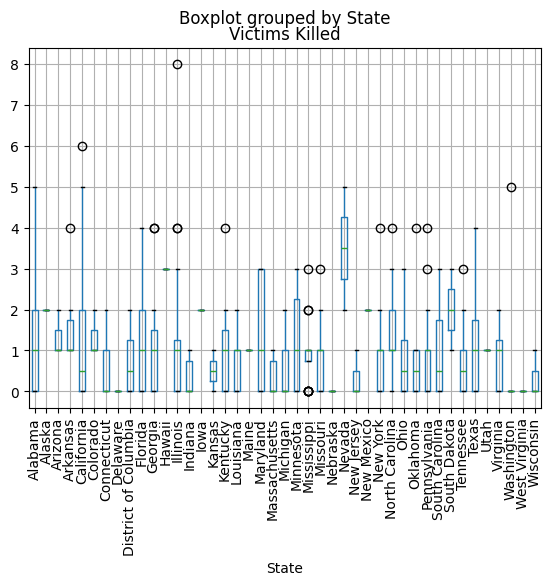

In [ ]:
arq.boxplot(column=['Victims Killed'],by='State',rot=90)


Vemos que não tem nenhum número muito fora do normal (o maior de vítimas assassinadas é 8), logo, concluímos que os outliers representam apenas casos extraordinários, e não erros de medida



```
# This is formatted as code
```

# Como as mortes de cada ocorrência se comportam nos diferentes Estados Americanos?



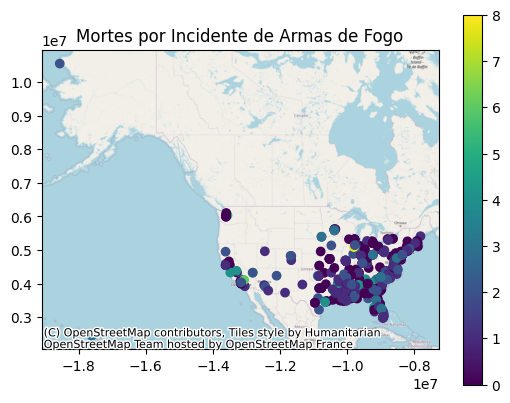

In [ ]:
geoarq = geo.GeoDataFrame(arq, geometry=geo.points_from_xy(arq.Longitude, arq.Latitude))
geoarq = geoarq.set_crs("epsg:4326")
geoarq_converted = geoarq.to_crs("epsg:3857")
ax = geoarq_mercator.plot(column='Victims Killed', legend=True)
ax.set_title("Mortes por Incidente de Armas de Fogo")
cx.add_basemap(ax, zoom=4, crs=geoarq_converted.crs)

Para restringir a análise às áreas mais centrais dos Estados Unidos e facilitar a vizualização, retiraremos os incidentes ocorrido no Alaska e Hawaii:

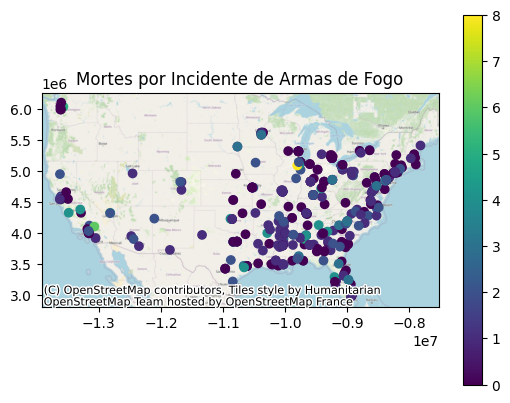

In [ ]:
arq_ = arq[arq['State'] != 'Alaska']
arq_ = arq_[arq_['State']!= 'Hawaii']
geoarq = geo.GeoDataFrame(arq_, geometry=geo.points_from_xy(arq_.Longitude, arq_.Latitude))
geoarq = geoarq.set_crs("epsg:4326")
geoarq_converted = geoarq.to_crs("epsg:3857")
ax = geoarq_converted.plot(column='Victims Killed', legend=True)
ax.set_title("Mortes por Incidente de Armas de Fogo")
cx.add_basemap(ax, zoom=5, crs=geoarq_converted.crs)

O código abaixo permite selecionar Estados para visualizar detalhes de suas respectivas ocorrências e pontos no mapa correspondentes(destacados em vermelho):

Lista de Estados:
Washington
Tennessee
Louisiana
Pennsylvania
Mississippi
Georgia
Indiana
Michigan
Oklahoma
Ohio
South Carolina
Missouri
Texas
California
Virginia
District of Columbia
North Carolina
Illinois
Minnesota
New York
Arizona
Alabama
Kentucky
Florida
New Jersey
Delaware
South Dakota
Wisconsin
Maryland
Massachusetts
Colorado
West Virginia
Maine
Connecticut
Kansas
Nebraska
Nevada
Arkansas
Utah
New Mexico
Iowa
Estado 1(mesma formatação da lista, digite "sair" quando tiver pego todos os estados que quer analisar): Washington
Ocorrências:

October 21, 2024, Washington, Fall City: Mortes: 5
September 2, 2024, Washington, Federal Way: Mortes: 0
August 20, 2024, Washington, Everett: Mortes: 0
August 5, 2024, Washington, Seattle: Mortes: 0
July 28, 2024, Washington, Auburn: Mortes: 0
Estado 2(mesma formatação da lista, digite "sair" quando tiver pego todos os estados que quer analisar): Colorado
Ocorrências:

August 14, 2024, Colorado, Colorado Springs: Mortes: 1
August 1, 2024, Colora

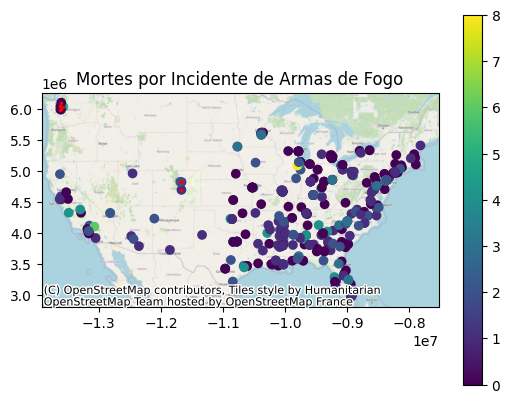

In [ ]:
arq_ = arq[arq['State'] != 'Alaska']
arq_ = arq_[arq_['State']!= 'Hawaii']
geoarq = geo.GeoDataFrame(arq_, geometry=geo.points_from_xy(arq_.Longitude, arq_.Latitude))
geoarq = geoarq.set_crs("epsg:4326")
geoarq_converted = geoarq.to_crs("epsg:3857")
ax = geoarq_converted.plot(column='Victims Killed', legend=True)
ax.set_title("Mortes por Incidente de Armas de Fogo")
cx.add_basemap(ax, zoom=5, crs=geoarq_converted.crs)
d = {}
for i in arq_.index:
  d.update({f"{arq_['State'][i].lower()}": ''})
for i in arq_.index:
  d[f"{arq_['State'][i].lower()}"]+='\n' + f"{arq_['Incident Date'][i]}, {arq_['State'][i]}, {arq_['City Or County'][i]}: Mortes: {arq_['Victims Killed'][i]}"
n = 0
print('Lista de Estados:')
for i in arq_['State'].unique():
  print(i)
while 1==1:
  n+=1
  x = input(f'Estado {n}(mesma formatação da lista, digite "sair" quando tiver pego todos os estados que quer analisar): ')
  if x == 'sair':
    break
  print('Ocorrências:')
  for i in d:
    if i == x.lower():
      print(d[i])
  selected_data = geoarq_converted[geoarq_converted['State'] == x]
  selected_data.plot(ax=ax, color='red', markersize=2, alpha=1)






```
# This is formatted as code
```

# Como os feridos de cada ocorrência se comportam nos diferentes Estados Americanos?



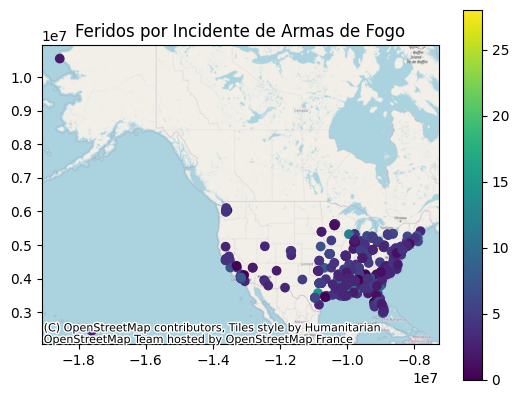

In [ ]:
geoarq = geo.GeoDataFrame(arq, geometry=geo.points_from_xy(arq.Longitude, arq.Latitude))
geoarq = geoarq.set_crs("epsg:4326")
geoarq_converted = geoarq.to_crs("epsg:3857")
ax = geoarq_mercator.plot(column='Victims Injured', legend=True)
ax.set_title("Feridos por Incidente de Armas de Fogo")
cx.add_basemap(ax, zoom=4, crs=geoarq_converted.crs)

Para restringir a análise às áreas mais centrais dos Estados Unidos e facilitar a vizualização, retiraremos os incidentes ocorrido no Alaska e Hawaii:

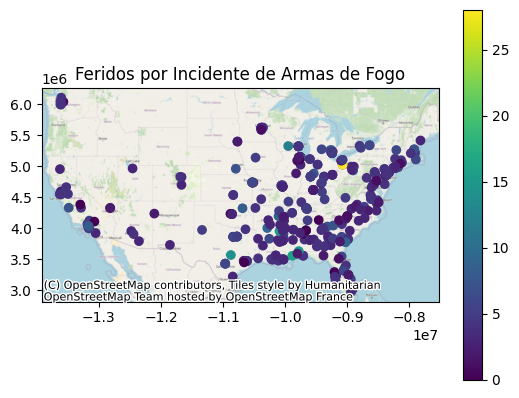

In [ ]:
arq_ = arq[arq['State'] != 'Alaska']
arq_ = arq_[arq_['State']!= 'Hawaii']
geoarq = geo.GeoDataFrame(arq_, geometry=geo.points_from_xy(arq_.Longitude, arq_.Latitude))
geoarq = geoarq.set_crs("epsg:4326")
geoarq_converted = geoarq.to_crs("epsg:3857")
ax = geoarq_converted.plot(column='Victims Injured', legend=True)
ax.set_title("Feridos por Incidente de Armas de Fogo")
cx.add_basemap(ax, zoom=5, crs=geoarq_converted.crs)

O código abaixo permite selecionar Estados para visualizar detalhes de suas respectivas ocorrências e pontos no mapa correspondentes(destacados em vermelho):

Lista de Estados:
Washington
Tennessee
Louisiana
Pennsylvania
Mississippi
Georgia
Indiana
Michigan
Oklahoma
Ohio
South Carolina
Missouri
Texas
California
Virginia
District of Columbia
North Carolina
Illinois
Minnesota
New York
Arizona
Alabama
Kentucky
Florida
New Jersey
Delaware
South Dakota
Wisconsin
Maryland
Massachusetts
Colorado
West Virginia
Maine
Connecticut
Kansas
Nebraska
Nevada
Arkansas
Utah
New Mexico
Iowa
Estado 1(mesma formatação da lista, digite "sair" quando tiver pego todos os estados que quer analisar): New Mexico
Ocorrências:

May 5, 2024, New Mexico, Gallup: Feridos: 2
Estado 2(mesma formatação da lista, digite "sair" quando tiver pego todos os estados que quer analisar): sair


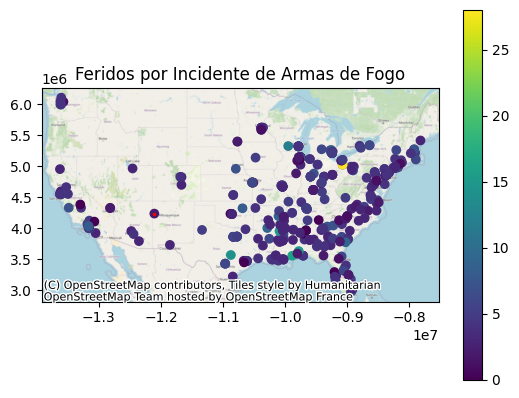

In [ ]:
arq_ = arq[arq['State'] != 'Alaska']
arq_ = arq_[arq_['State']!= 'Hawaii']
geoarq = geo.GeoDataFrame(arq_, geometry=geo.points_from_xy(arq_.Longitude, arq_.Latitude))
geoarq = geoarq.set_crs("epsg:4326")
geoarq_converted = geoarq.to_crs("epsg:3857")
ax = geoarq_converted.plot(column='Victims Injured', legend=True)
ax.set_title("Feridos por Incidente de Armas de Fogo")
cx.add_basemap(ax, zoom=5, crs=geoarq_converted.crs)
d = {}
for i in arq_.index:
  d.update({f"{arq_['State'][i].lower()}": ''})
for i in arq_.index:
  d[f"{arq_['State'][i].lower()}"]+='\n' + f"{arq_['Incident Date'][i]}, {arq_['State'][i]}, {arq_['City Or County'][i]}: Feridos: {arq_['Victims Injured'][i]}"
n = 0
print('Lista de Estados:')
for i in arq_['State'].unique():
  print(i)
while 1==1:
  n+=1
  x = input(f'Estado {n}(mesma formatação da lista, digite "sair" quando tiver pego todos os estados que quer analisar): ')
  if x == 'sair':
    break
  print('Ocorrências:')
  for i in d:
    if i == x.lower():
      print(d[i])
  selected_data = geoarq_converted[geoarq_converted['State'] == x]
  selected_data.plot(ax=ax, color='red', markersize=2, alpha=1)




```
# This is formatted as code
```

# Quais os estados com maior ratio de mortos/feridos, em média, por incidente?



In [ ]:
l1 = []
l2 = []
for i in arq['State'].unique():
  l1.append(f'{i}')
  l2.append((arq[arq['State']==i]['Victims Killed'].mean())/(arq[arq['State']==i]['Victims Injured'].mean()))
df = pd.Series(index=l1,data=l2, name='Mortos/Feridos')
df.sort_values(ascending=False)


,Mortos/Feridos
Nevada,2.333333
Hawaii,1.500000
Alaska,1.000000
New Mexico,1.000000
South Dakota,0.800000
North Carolina,0.487179
Iowa,0.400000
Arizona,0.400000
Colorado,0.400000
Maryland,0.388889


Vemos que os Estados com ataques maior porcentagem de mortos por ataque são Nevada, Hawaii, Nevada e New Mexico. O que o "sucesso" em assassinar as vítimas nos diz sobre o ataque? Foram usadas armas mais potentes? Foi simplesmente por ter uma amostra menor de vítimas?

Agora vejamos quais os estados com maior número de vítimas (mortos + feridos):

In [ ]:
l1 = []
l2 = []
for i in arq['State'].unique():
  l1.append(f'{i}')
  l2.append((arq[arq['State']==i]['Victims Killed'].mean())+(arq[arq['State']==i]['Victims Injured'].mean()))
df = pd.Series(index=l1,data=l2, name='Mortos/Feridos')
df.sort_values(ascending=False)

,Mortos/Feridos
Arkansas,7.166667
Iowa,7.000000
Nebraska,7.000000
Michigan,6.666667
Alabama,6.619048
Ohio,6.562500
Oklahoma,6.500000
Mississippi,6.450000
Wisconsin,6.142857
Indiana,5.900000


Notamos que não há nenhuma relação entre o ratio Mortos/feridos e o tamanho da amostra(número de vítimas), sugerindo que os ataques de maior ratio eram de natureza mais agressiva.